In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [2]:
df1 = pd.read_csv('..input/can-i-be-influencer/train.csv')
df2 = pd.read_csv('..input/can-i-be-influencer/train_keywords.csv')
df3 = pd.read_csv('..input/can-i-be-influencer/train_colors.csv')

df1_test = pd.read_csv('..input/can-i-be-influencer/test.csv')
df2_test = pd.read_csv('..input/can-i-be-influencer/test_keywords.csv')
df3_test = pd.read_csv('..input/can-i-be-influencer/test_colors.csv')


In [3]:
df3 = df3.drop_duplicates(['image_id'])
df3_test = df3_test.drop_duplicates(['image_id'])

df2 = df2.drop_duplicates(['image_id'])
df2_test = df2_test.drop_duplicates(['image_id'])

In [4]:
train = df1.merge(df3, on = ['image_id'], how = 'left')
train = train.merge(df2, on=['image_id'], how="left")

test = pd.merge(df1_test, df3_test, how="left", on=['image_id'])
test = pd.merge(test, df2_test, how="left", on=['image_id'])

print(train.shape)


print(test.shape)


(12197, 36)

(6568, 35)


In [5]:

train = train.reset_index(drop=True) # drope the Id

test = test.reset_index(drop=True) # drope the Id


y = train['stats_downloads']

train = train.drop(['stats_downloads'], axis=1)

In [6]:
train = train.drop(['image_id'],axis=1)

In [7]:
train = train.drop(['photo_url','photo_image_url','photo_submitted_at'],axis=1)
test = test.drop(['photo_url','photo_image_url','photo_submitted_at'],axis=1)

In [8]:
#gathering columns based on categorical and ordinal columns

train.head()

,obs_day,obs_hour,obs_min,obs_sec,image_category,width,height,aspect_ratio,description1,description2,...,R,G,B,image_hex,keyword,pixel_coverage,color_score,image_classification,classification_keyword,confidence_value
0,Thursday,15,13,10,Featured,2592,1728,1.50,Pristine water lily,rule of thirds photography of pink and white l...,...,55.0,46.0,21.0,372e15,darkslategray,0.028467,0.010622,Predicted,sacred lotus,NaN
1,Wednesday,21,59,51,Featured,4000,6000,0.67,NaN,sand in desert,...,171.0,189.0,209.0,ABBDD1,lightsteelblue,0.059733,0.031453,Predicted,hook,23.792002
2,Tuesday,4,10,11,Featured,5504,8256,0.67,NaN,green trees near brown mountain during daytime,...,25.0,27.0,24.0,191B18,black,0.247067,0.098444,Predicted,landscape,48.690178
3,Monday,23,46,21,Featured,3627,2040,1.78,NaN,gray dock aerial photography,...,163.0,153.0,149.0,A39995,darkgray,0.126984,0.140073,Predicted,drinking fountain,26.997532
4,Saturday,11,4,20,Featured,4896,3264,1.50,NaN,people walking on green grass field near lake ...,...,181.0,157.0,28.0,B59D1C,darkgoldenrod,0.034400,0.078875,Predicted,straw,32.615032


<AxesSubplot: xlabel='obs_day', ylabel='stats_downloads'>

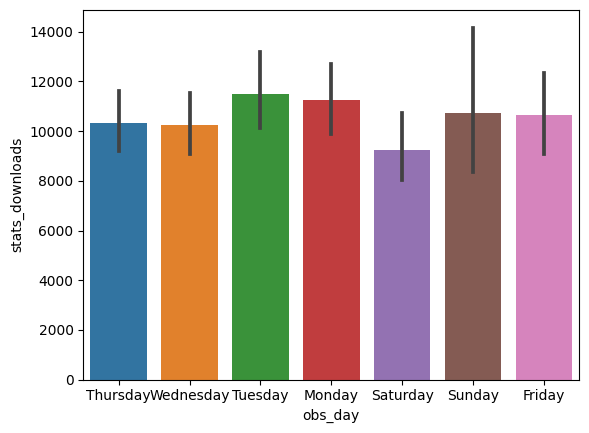

In [9]:
sns.barplot(x=df1['obs_day'], y=df1['stats_downloads'])

<AxesSubplot: xlabel='image_category', ylabel='stats_downloads'>

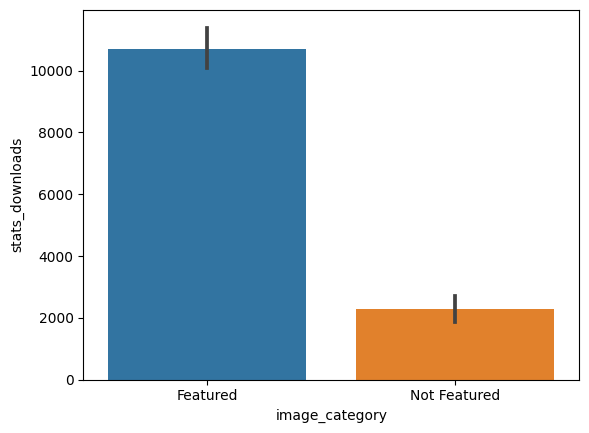

In [10]:
sns.barplot(x=df1['image_category'], y=df1['stats_downloads'])

<AxesSubplot: xlabel='image_category', ylabel='stats_downloads'>

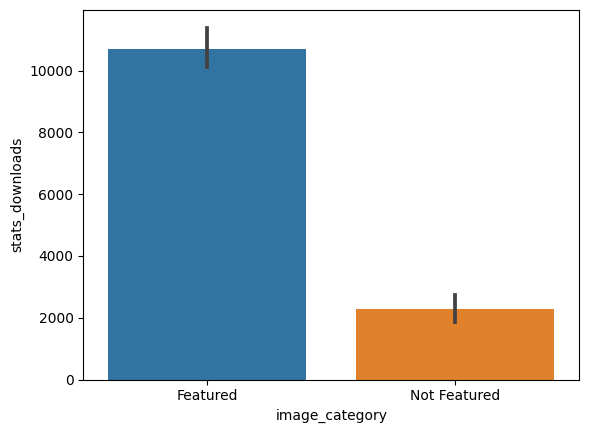

In [11]:
columns = ['obs_day', 'image_category','image_classification']
sns.barplot(x= train[columns[1]], y= df1['stats_downloads'])

<AxesSubplot: xlabel='obs_day', ylabel='stats_downloads'>

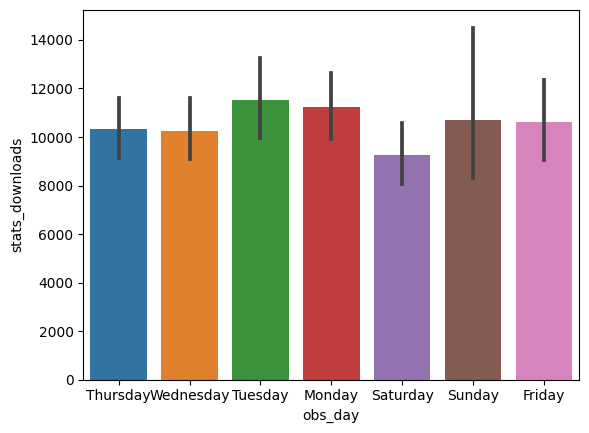

In [12]:
sns.barplot(x= train[columns[0]], y= df1['stats_downloads'])

<AxesSubplot: xlabel='image_classification', ylabel='stats_downloads'>

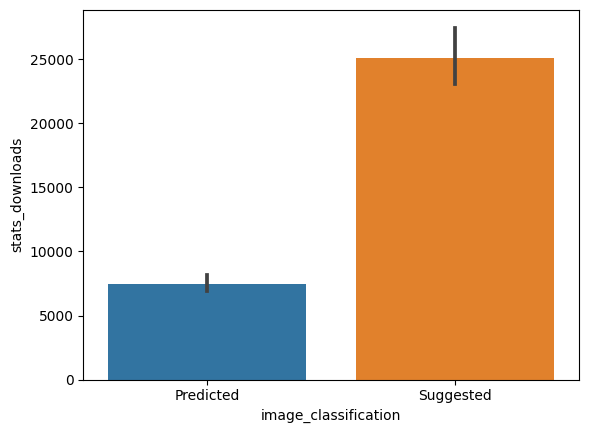

In [13]:
sns.barplot(x= train[columns[2]], y= df1['stats_downloads'])

In [14]:
train.head()

,obs_day,obs_hour,obs_min,obs_sec,image_category,width,height,aspect_ratio,description1,description2,...,R,G,B,image_hex,keyword,pixel_coverage,color_score,image_classification,classification_keyword,confidence_value
0,Thursday,15,13,10,Featured,2592,1728,1.50,Pristine water lily,rule of thirds photography of pink and white l...,...,55.0,46.0,21.0,372e15,darkslategray,0.028467,0.010622,Predicted,sacred lotus,NaN
1,Wednesday,21,59,51,Featured,4000,6000,0.67,NaN,sand in desert,...,171.0,189.0,209.0,ABBDD1,lightsteelblue,0.059733,0.031453,Predicted,hook,23.792002
2,Tuesday,4,10,11,Featured,5504,8256,0.67,NaN,green trees near brown mountain during daytime,...,25.0,27.0,24.0,191B18,black,0.247067,0.098444,Predicted,landscape,48.690178
3,Monday,23,46,21,Featured,3627,2040,1.78,NaN,gray dock aerial photography,...,163.0,153.0,149.0,A39995,darkgray,0.126984,0.140073,Predicted,drinking fountain,26.997532
4,Saturday,11,4,20,Featured,4896,3264,1.50,NaN,people walking on green grass field near lake ...,...,181.0,157.0,28.0,B59D1C,darkgoldenrod,0.034400,0.078875,Predicted,straw,32.615032


In [15]:
num_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

In [16]:
for col in num_cols:
    
    sk = train[col].skew()
    if abs(sk) <= 2:
        my_imputer = SimpleImputer(strategy='mean')
        train[col] = my_imputer.fit_transform(np.array(train[col]).reshape(-1, 1))
        test[col] = my_imputer.transform( np.array(test[col]).reshape(-1, 1))

In [17]:
cat_cols = ['image_category', 'image_classification','obs_day', 'country', 'city', 'keyword', 'classification_keyword']

In [18]:
len(train['classification_keyword'].unique())

2379

In [19]:
train['classification_keyword']

0             sacred lotus
1                     hook
2                landscape
3        drinking fountain
4                    straw
               ...        
12192                 boat
12193              indoors
12194                  ice
12195                  fir
12196               crocus
Name: classification_keyword, Length: 12197, dtype: object

In [20]:
my_imputer = SimpleImputer(strategy='most_frequent')
for col in cat_cols:
    train[col] = my_imputer.fit_transform(np.array(train[col]).reshape(-1,1))
    test[col] = my_imputer.transform(np.array(test[col]).reshape(-1,1))

In [21]:
train[cat_cols].isna().sum()

image_category            0
image_classification      0
obs_day                   0
country                   0
city                      0
keyword                   0
classification_keyword    0
dtype: int64

In [22]:
num_cols = ['obs_hour', 'obs_min', 'obs_sec', 'width', 'height', 'aspect_ratio', 'iso', 'aperture_value', 'focal_length', 'latitude', 'longitude', 'R', 'G', 'B', 'pixel_coverage', 'color_score', 'confidence_value']

In [23]:
for col in num_cols:
    sk = train[col].skew()
    if abs(sk) <= 2:
        my_imputer = SimpleImputer(strategy='mean')
        train[col] = my_imputer.fit_transform(np.array(train[col]).reshape(-1, 1))
        test[col] = my_imputer.transform( np.array(test[col]).reshape(-1, 1))
        
    else:
        my_imputer = SimpleImputer(strategy='median')
        train[col] = my_imputer.fit_transform(np.array(train[col]).reshape(-1, 1))
        test[col] = my_imputer.transform( np.array(test[col]).reshape(-1, 1))

In [26]:
train = train.drop(['description1','description2','camera_make','camera_model','exposure_time','image_hex'],axis=1)
test = test.drop(['description1','description2','camera_make','camera_model','exposure_time','image_hex'],axis=1)

In [29]:
ds_train = train
ds_test = test

In [30]:
# transform cat cols to numericals

catdata = ds_train[cat_cols].copy()

cattest = ds_test[cat_cols].copy()

catordata = pd.DataFrame()
testordata = pd.DataFrame()

all_Cat = pd.concat([catdata,cattest])

#display(all_Cat)

for cols in all_Cat.columns:
    category_enc = preprocessing.LabelEncoder()
    #print(cols)
    category_enc.fit(all_Cat[cols])
    catordata[cols] = category_enc.transform(catdata[cols])
    testordata[cols] = category_enc.transform(cattest[cols])

catordata.index = catdata.index
testordata.index = cattest.index

In [31]:

numdata  = ds_train[num_cols].copy()
numtest  = ds_test[num_cols].copy()

stsc = StandardScaler()

st_train = pd.DataFrame(stsc.fit_transform(numdata), columns = numdata.columns, index = numdata.index)

st_test = pd.DataFrame(stsc.transform(numtest), columns = numtest.columns,index = numtest.index)




#features =  pd.concat([catordata,st_train], axis=1)

#features.columns = ds_train.columns

#test_fe =  pd.concat([testordata,st_test], axis=1)
#test_fe.columns = ds_test.columns

print("scaled and ordinal transformed features-------")

display(st_train)

print("scaled and ordinal transformed test data-------")
display(st_test)

scaled and ordinal transformed features-------


,obs_hour,obs_min,obs_sec,width,height,aspect_ratio,iso,aperture_value,focal_length,latitude,longitude,R,G,B,pixel_coverage,color_score,confidence_value
0,0.351791,-0.935408,-1.157396,-1.406032,-1.873221,0.871189,-0.257854,2.425719,-0.190916,5.260713e-16,8.328103e-17,-1.032425,-1.165560,-1.312738,-0.412183,-0.807578,3.443623e-16
1,1.255527,1.699557,1.236928,-0.348069,1.312255,-1.139391,-0.331240,-0.644503,-0.412617,5.260713e-16,8.328103e-17,0.716165,1.238182,1.623591,-0.146045,-0.614375,-6.774471e-01
2,-1.305060,-1.107253,-1.098998,0.782028,2.994472,-1.139391,-0.357658,-0.564411,-0.213086,5.260713e-16,8.328103e-17,-1.484646,-1.484939,-1.265882,1.448516,0.006944,5.292351e-01
3,1.556773,0.954893,-0.515016,-0.628339,-1.640574,1.549456,-0.302619,-0.724596,-0.693068,-1.474131e-01,-1.463098e+00,0.595573,0.633044,0.686465,0.426387,0.393048,-5.220921e-01
4,-0.250700,-1.450944,-0.573414,0.325180,-0.727881,0.871189,-0.111083,0.396702,-0.499080,2.317334e+00,-1.348955e-01,0.866906,0.700282,-1.203407,-0.361679,-0.174549,-2.498417e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12192,0.050545,-1.279099,-0.281424,0.012600,1.395023,-0.994048,-0.331240,0.183122,2.580337,5.260713e-16,8.328103e-17,1.032720,1.406276,0.374089,-0.563695,0.025506,-2.646634e-01
12193,1.104905,0.152947,-0.106229,-1.548046,-0.673448,-1.018272,-0.111083,0.022936,0.363334,5.260713e-16,8.328103e-17,-0.730944,-1.249607,-1.328357,-0.336081,-0.022206,-1.075282e+00
12194,-1.756928,1.413148,-0.807007,0.541582,-0.584714,0.871189,-0.111083,-0.244040,-0.512382,-5.374659e+00,4.505678e+00,-1.198239,0.313666,0.920746,-0.167608,-0.785594,7.514418e-01
12195,0.803659,-1.565508,0.127363,1.154720,-0.179073,0.871189,0.182458,-0.831387,-0.190916,4.406300e-01,7.330957e-01,-0.700796,-0.493185,-0.812938,-0.417858,-0.257796,6.200576e-01


scaled and ordinal transformed test data-------


,obs_hour,obs_min,obs_sec,width,height,aspect_ratio,iso,aperture_value,focal_length,latitude,longitude,R,G,B,pixel_coverage,color_score,confidence_value
0,0.201168,0.152947,1.587317,-0.336047,1.324185,-1.139391,-0.331240,-0.110552,-0.190916,5.260713e-16,8.328103e-17,-0.188278,-0.644469,-0.750463,-0.573909,0.428509,-8.139695e-01
1,0.653036,-0.820844,-0.223026,1.335054,-0.059767,0.871189,-0.331240,0.183122,2.580337,1.665707e+00,2.614905e-01,-0.037537,0.044716,0.186664,0.171165,1.258658,-3.715899e-01
2,-1.003814,1.413148,0.711345,0.757983,-0.441547,0.871189,-0.331240,0.583586,-0.190916,5.260713e-16,8.328103e-17,0.957350,2.045033,1.920348,-0.029716,0.065419,-2.106925e-01
3,0.201168,1.126739,0.944937,-0.348069,1.312255,-1.139391,-0.331240,0.823864,0.197059,5.260713e-16,8.328103e-17,1.334201,1.238182,0.967603,-0.580719,-0.813570,3.443623e-16
4,-1.756928,0.152947,-0.047831,1.154720,-0.179073,0.871189,-0.287208,0.183122,0.285739,5.260713e-16,8.328103e-17,0.203648,0.196000,0.202283,0.304518,-0.584688,-1.016019e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-0.401323,-0.935408,1.120132,-0.756828,0.172880,-0.897152,-0.111083,-0.831387,-0.190916,5.260713e-16,8.328103e-17,-0.112908,-0.694898,-0.797319,-0.567413,-0.420722,-5.068369e-01
6564,-0.401323,0.210229,0.886539,0.290616,1.902075,-1.042495,-0.169792,-0.110552,0.019699,5.260713e-16,8.328103e-17,1.304053,1.406276,-0.547418,-0.648124,-0.876490,-9.969029e-01
6565,0.502413,-0.305307,1.587317,0.012600,1.849133,-1.139391,-0.169792,-0.564411,-0.135491,5.260713e-16,8.328103e-17,-0.308870,0.851566,1.264359,-0.591500,-0.632622,-4.578907e-01
6566,0.954282,0.897611,1.353724,-1.161078,0.102042,-1.139391,-0.221162,-0.110552,-0.357192,5.260713e-16,8.328103e-17,-1.786127,-1.753889,-1.437689,1.834956,0.059447,2.929097e-01


In [32]:
cat_cols = ['image_category', 'image_classification']

In [33]:
OneHot_cal= cat_cols

X_model = ds_train[OneHot_cal].copy()
X_testing = ds_test[OneHot_cal].copy()



# one-Hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Apply one-hot encoder to each column with categorical data

Xoh = pd.DataFrame(OH_encoder.fit_transform(X_model[OneHot_cal]))
Xoh_test = pd.DataFrame(OH_encoder.transform(X_testing[OneHot_cal]))

# One-hot encoding removed index; put it back
Xoh.index = X_model.index
Xoh_test.index = X_testing.index

# reindexing the columns
hotcols = []

for cols in OneHot_cal:
    
    for cols2 in X_model[cols].unique():
        
        hotcols.append(str(cols) + "_" + str(cols2))

Xoh.columns = hotcols

# For test data we have some more unique values

testhotcols = []

Xoh_test.columns = hotcols  

# Remove categorical columns (will replace with one-hot encoding)
#X_model = X_model.drop(OneHot_cal, axis=1)
#X_testing = X_testing.drop(OneHot_cal, axis=1)

print("----One hote encoder columns of train data------")
print(Xoh.columns)

print("----One hote encoder columns of test data-------")
print(Xoh_test.columns)

----One hote encoder columns of train data------

Index(['image_category_Featured', 'image_category_Not Featured',

       'image_classification_Predicted', 'image_classification_Suggested'],

      dtype='object')

----One hote encoder columns of test data-------

Index(['image_category_Featured', 'image_category_Not Featured',

       'image_classification_Predicted', 'image_classification_Suggested'],

      dtype='object')


/home/notorious/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

  warnings.warn(


In [34]:
# Add one-hot encoded columns to numerical features

train_data = pd.concat([Xoh,catordata,st_train], axis=1)
test_data = pd.concat([Xoh_test,testordata,st_test], axis=1)

display(train_data)
display(test_data)

,image_category_Featured,image_category_Not Featured,image_classification_Predicted,image_classification_Suggested,image_category,image_classification,obs_day,country,city,keyword,...,aperture_value,focal_length,latitude,longitude,R,G,B,pixel_coverage,color_score,confidence_value
0,1.0,0.0,1.0,0.0,0,0,4,285,2413,33,...,2.425719,-0.190916,5.260713e-16,8.328103e-17,-1.032425,-1.165560,-1.312738,-0.412183,-0.807578,3.443623e-16
1,1.0,0.0,1.0,0.0,0,0,6,291,1249,67,...,-0.644503,-0.412617,5.260713e-16,8.328103e-17,0.716165,1.238182,1.623591,-0.146045,-0.614375,-6.774471e-01
2,1.0,0.0,1.0,0.0,0,0,5,291,1249,7,...,-0.564411,-0.213086,5.260713e-16,8.328103e-17,-1.484646,-1.484939,-1.265882,1.448516,0.006944,5.292351e-01
3,1.0,0.0,1.0,0.0,0,0,1,291,958,22,...,-0.724596,-0.693068,-1.474131e-01,-1.463098e+00,0.595573,0.633044,0.686465,0.426387,0.393048,-5.220921e-01
4,1.0,0.0,1.0,0.0,0,0,2,116,2530,21,...,0.396702,-0.499080,2.317334e+00,-1.348955e-01,0.866906,0.700282,-1.203407,-0.361679,-0.174549,-2.498417e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12192,1.0,0.0,1.0,0.0,0,0,1,291,1249,25,...,0.183122,2.580337,5.260713e-16,8.328103e-17,1.032720,1.406276,0.374089,-0.563695,0.025506,-2.646634e-01
12193,1.0,0.0,1.0,0.0,0,0,1,291,1249,105,...,0.022936,0.363334,5.260713e-16,8.328103e-17,-0.730944,-1.249607,-1.328357,-0.336081,-0.022206,-1.075282e+00
12194,1.0,0.0,1.0,0.0,0,0,4,175,1784,117,...,-0.244040,-0.512382,-5.374659e+00,4.505678e+00,-1.198239,0.313666,0.920746,-0.167608,-0.785594,7.514418e-01
12195,1.0,0.0,1.0,0.0,0,0,4,126,1249,26,...,-0.831387,-0.190916,4.406300e-01,7.330957e-01,-0.700796,-0.493185,-0.812938,-0.417858,-0.257796,6.200576e-01


,image_category_Featured,image_category_Not Featured,image_classification_Predicted,image_classification_Suggested,image_category,image_classification,obs_day,country,city,keyword,...,aperture_value,focal_length,latitude,longitude,R,G,B,pixel_coverage,color_score,confidence_value
0,1.0,0.0,1.0,0.0,0,0,6,291,1249,26,...,-0.110552,-0.190916,5.260713e-16,8.328103e-17,-0.188278,-0.644469,-0.750463,-0.573909,0.428509,-8.139695e-01
1,1.0,0.0,1.0,0.0,0,0,2,206,1249,47,...,0.183122,2.580337,1.665707e+00,2.614905e-01,-0.037537,0.044716,0.186664,0.171165,1.258658,-3.715899e-01
2,1.0,0.0,1.0,0.0,0,0,5,291,1249,92,...,0.583586,-0.190916,5.260713e-16,8.328103e-17,0.957350,2.045033,1.920348,-0.029716,0.065419,-2.106925e-01
3,1.0,0.0,1.0,0.0,0,0,5,291,1249,118,...,0.823864,0.197059,5.260713e-16,8.328103e-17,1.334201,1.238182,0.967603,-0.580719,-0.813570,3.443623e-16
4,1.0,0.0,1.0,0.0,0,0,0,291,1249,47,...,0.183122,0.285739,5.260713e-16,8.328103e-17,0.203648,0.196000,0.202283,0.304518,-0.584688,-1.016019e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,1.0,0.0,1.0,0.0,0,0,5,291,1249,105,...,-0.831387,-0.190916,5.260713e-16,8.328103e-17,-0.112908,-0.694898,-0.797319,-0.567413,-0.420722,-5.068369e-01
6564,1.0,0.0,1.0,0.0,0,0,1,291,1249,25,...,-0.110552,0.019699,5.260713e-16,8.328103e-17,1.304053,1.406276,-0.547418,-0.648124,-0.876490,-9.969029e-01
6565,1.0,0.0,1.0,0.0,0,0,3,291,1249,13,...,-0.564411,-0.135491,5.260713e-16,8.328103e-17,-0.308870,0.851566,1.264359,-0.591500,-0.632622,-4.578907e-01
6566,1.0,0.0,1.0,0.0,0,0,1,12,1071,7,...,-0.110552,-0.357192,5.260713e-16,8.328103e-17,-1.786127,-1.753889,-1.437689,1.834956,0.059447,2.929097e-01


In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, y, test_size=0.25,random_state=0)

# we have to check if spliting the validation data specifically for XGBOX will have any contribution to final overffiting
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train, y_train, test_size=0.05,random_state=0)

model = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=4)

model.fit(X_train2, y_train2,
          early_stopping_rounds=5,eval_set=[(X_valid2, y_valid2)],verbose=False)

preds_valid = model.predict(X_valid)

print(mean_squared_error(y_valid, preds_valid, squared=False))

37029.44435061335


/home/notorious/miniconda3/envs/ml/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

  warnings.warn(


In [38]:
XGBRparms={'lambda': 7.648249009539899,
 'alpha': 0.0012695301752836863,
 'colsample_bytree': 0.5,
 'subsample': 0.8,
 'learning_rate': 0.014,
 'n_estimators': 35000,
 'max_depth': 9,
 'random_state': 48,
 'min_child_weight': 3}

param = {'tree_method' : 'gpu_hist',
         'gpu_id' : 0,
         'predictor' : 'gpu_predictor'}
    
param.update(XGBRparms)


splits = 2

kf = KFold(n_splits=splits,random_state=random.randint(10, 200), shuffle = True)

scores = []

Pred_test = pd.DataFrame(columns=['fold_' + str(cols) for cols in range(splits)])

for k, (train_rows, valid_rows) in enumerate(kf.split(X_train, y_train)):
        
    train_index = X_train.index[train_rows]
    valid_index = X_train.index[valid_rows]

    Xtrain = X_train.loc[train_index,:]
    ytrain = y_train.loc[train_index]
    Xvalid = X_train.loc[valid_index,:]
    yvalid = y_train.loc[valid_index]
    
    model = XGBRegressor(**param)
    model.fit(Xtrain, ytrain,
              early_stopping_rounds=100,eval_set=[(Xvalid, yvalid)],verbose=False)

    preds_Kflod = model.predict(X_valid)
    score = mean_squared_error(y_valid, preds_Kflod, squared=False)
    scores.append(score)
    print('Fold: %s, Acc: %.5f' % (k+1, score))
    
    Pred_test['fold_' + str(k)] = model.predict(test_data)
    
    
Pred_test

/home/notorious/miniconda3/envs/ml/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

  warnings.warn(


Fold: 1, Acc: 34886.70634


/home/notorious/miniconda3/envs/ml/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

  warnings.warn(


Fold: 2, Acc: 34498.27433


,fold_0,fold_1
0,3552.657227,4565.390137
1,3142.064697,4949.196289
2,5928.493652,4601.666016
3,5501.172852,6814.097656
4,4438.348145,4954.331543
...,...,...
6563,3160.771729,3126.350342
6564,3312.694336,3316.800293
6565,2549.969971,2965.365234
6566,4691.961426,3678.077393


In [39]:
predictions = Pred_test.mean(axis=1)

predictions

0       4059.023682
1       4045.630371
2       5265.080078
3       6157.635254
4       4696.339844
           ...     
6563    3143.561035
6564    3314.747314
6565    2757.667480
6566    4185.019531
6567    4051.348877
Length: 6568, dtype: float32

In [42]:
output = pd.DataFrame({'image_id': test['image_id'], 'stats_downloads': predictions})

output

,image_id,stats_downloads
0,2322208d63,4059.023682
1,847b5fcee1,4045.630371
2,0e1a37b065,5265.080078
3,8c8c9d4355,6157.635254
4,8ff19c3747,4696.339844
...,...,...
6563,a41cfba199,3143.561035
6564,73bbb77964,3314.747314
6565,22028b67b0,2757.667480
6566,7abf54e623,4185.019531


In [43]:
output.to_csv('submission.csv', index=False)